# **GEOET - Penman-Monteith FAO** 
Authors: Concetta D'Amato, Michele Bottazzi and Riccardo Rigon. 

This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
___

| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| Prospero | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |

### **Component Description**
The GEOET component offers the evapotraspiration formulation of Penman-Monteith [FAO](https://www.fao.org/3/X0490E/x0490e06.htm) model. The original Penman-Monteith equation is:
\begin{equation}
\lambda\ ET = \dfrac{\Delta\cdot (R_{n} - G)+\frac{\rho_{a}\cdot\ c_{p}(e_{s}-e)}{r_{a}}}{\Delta+\gamma\cdot(1+\frac{r_{s}}{r_{a}})}
\end{equation}
where:
- $\lambda ET$ is the evapotranspiration in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $\Delta$ is the slope of the saturation vapor-pressure curve expressed in ($kP_{a}\dot °C^{−1}$); 
- $R_{n}$ is the net radiation expressed in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ is the soil heat flux at the soil surface in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $\rho_{a}$ is the average density of the air at constant pressure ; 
- $c_{p}$ is the air specific heat;
- $e_{s}$ is the mean saturation vapor-pressure expressed in ($kP_{a}$); 
- $e_{a}$ is the mean actual vapor-pressure; 
- $\gamma$ is the psychometric constant expressed in ($kP_{a} \cdot$ °$C^{−1}$); 
- $r_{s}$ is the surface resistence; 
- $r_{a}$ is the aerodynamic resistance.

The FAO Penman-Monteith method can be derived from the original Penman-Monteith equation and the aerodynamic resistance and surface resistance equations determined by FAO to estimate a reference evapotranspiration:

\begin{equation}
 ET_{0}^{FAO} =  K_{s} \cdot K_{c} \cdot \dfrac{0.408\cdot \Delta\cdot (R_{n} - G)+\gamma\cdot u_{2}\cdot(e_{s}-e)\cdot\frac{C_{p}}{T+273}}{\Delta+\gamma\cdot(1+C_{d}\cdot u_{2})}
\end{equation}

With:
\begin{equation}
 G =  \begin{cases}
   G_{morn}\cdot R_{n} \quad daylight\\G_{night}\cdot R_{n} \quad nighttime
   \end{cases} 
\end{equation}
where:
- $ET_{0}$ or $ET$ are expressed in [$mm \cdot day^{−1}$] or [$mm\cdot hour^{−1}$]; 
- $K_{s}$ is the water stress coefficient [-];
- $K_{c}$ is the crop coefficient [-]; [Tabella 12](https://www.fao.org/4/X0490E/x0490e0b.htm#TopOfPage:~:text=may%20increase%20substantially.-,TABLE%2012,-.%20Single%20(time%2Daveraged)
- $R_{n}$ is the net radiation expressed in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ is the soil heat flux at the soil surface in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $T$ is the mean daily or hourly air temperature expressed in (°C) ; 
- $u_{2}$ is the wind speed in ($m\cdot s^{−1}$); 
- $e_{s}$ is the mean saturation vapor-pressure expressed in ($kP_{a}$); 
- $e$ is the mean actual vapor-pressure; 
- $\Delta$ is the slope of the saturation vapor-pressure curve expressed in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ is the psychometric constant expressed in ($kP_{a} \cdot$ °$C^{−1}$); 
- $C_{d}$ is a coefficient equal to 0.34 and $C_{p}$ is a coefficient equal to 900 in the case of a daily time step and equal to 37 in the case of a hourly time step.


### **Detailed Inputs description**
General description
The input file is a .csv file containing a header and one or more time series of input data,
depending on the number of stations involved. Each column of the file is associated to a
different station.
The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- The fourth and fifth rows contain the IDs of the stations (e.g. station number 8:value 8, ID, ,8);
- The sixth row contains the information about the type of the input data (in thiscase, one column with the date and one column with double values);
- The seventh row specifies the date format (YYYY-MM-dd HH:mm).


- #### **Net radiation**
The net radiation is given in time series of ($W/m^{2}$) values. The conversion from ($W/m^{2}$) to ($MJ\cdot m^{2}$) is automatically done by the component.
- #### **Average wind speed**
The average wind speed is given in time series of (m/s) values.
- #### **Relative humidity**
The relative humidity is given in time series or raster maps of (% ) values.
- #### **Air temperature**
The air temperature is given in time series of (°C) values. The conversion in K is directly done by the component.
- #### **$G_{morn}$**
$G_{morn}$ is the coefficient for the soil heat flux during daylight
- #### **$G_{night}$**
$G_{night}$ is the coefficient for the soil heat flux during nighttime
- #### **Start Date**
Start Date is a string containing the first day of the simulation.

### **Detailed Outputs description**
The output file will have exactly the same heading of the input file. 
- #### **Time series of the latent heat (W/m$^{2}$)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.
- #### **Time series of the evapotranspiration (mm)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import os

In [2]:
oms_project_path = os.path.dirname(os.getcwd())
os.chdir(oms_project_path+'/resources/Output/')
#os.listdir()

## Read the Penman Monteith FAO output

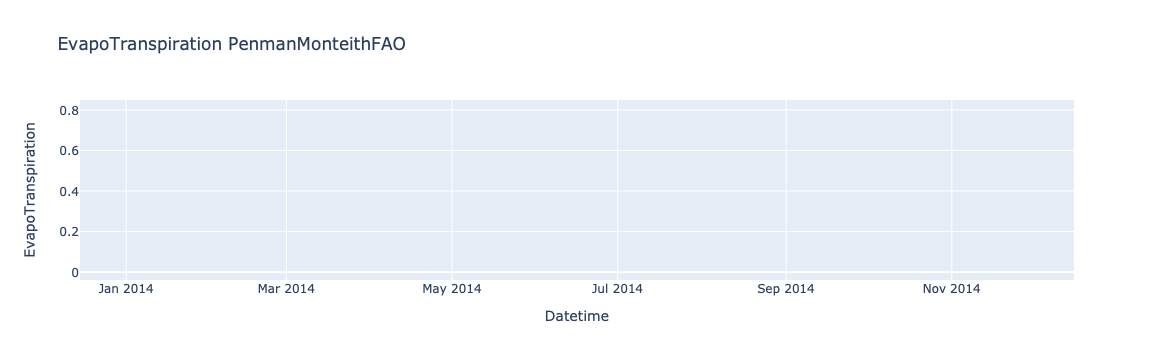

In [3]:
df = pd.read_csv('ETPotentialFAOCavone_pot_test.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','EvapoTranspiration']
fig = px.line(df, x='Datetime', y='EvapoTranspiration', title='EvapoTranspiration PenmanMonteithFAO')
fig.update_traces(line_color='green')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

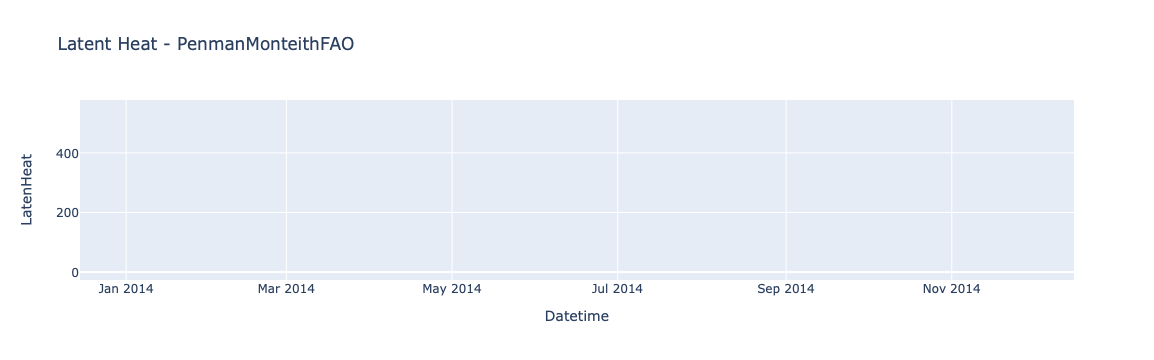

In [4]:
df2 = pd.read_csv('FluxETPotentialFAOCavone_pot_test.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','LatenHeat']
fig = px.line(df2, x='Datetime', y='LatenHeat', title='Latent Heat - PenmanMonteithFAO')
fig.update_traces(line_color='red')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

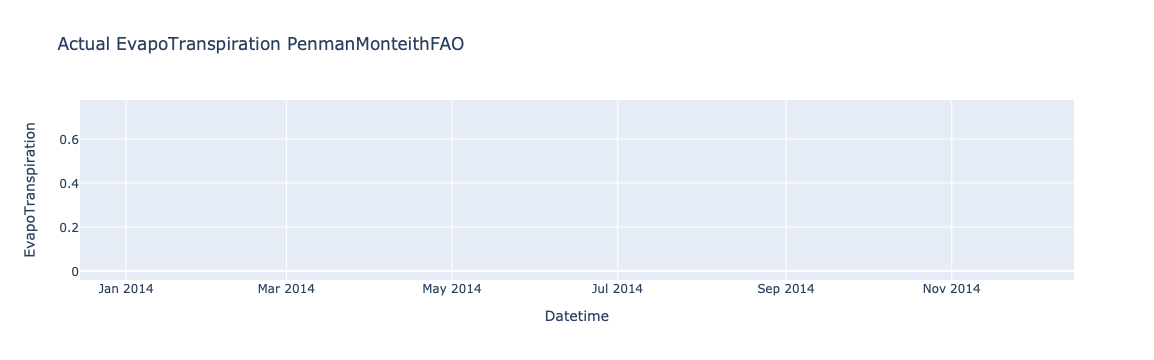

In [5]:
df3 = pd.read_csv('ETPotentialFAOCavone_test.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df3.columns = ['Datetime','EvapoTranspiration']
fig = px.line(df3, x='Datetime', y='EvapoTranspiration', title='Actual EvapoTranspiration PenmanMonteithFAO')
fig.update_traces(line_color='green')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

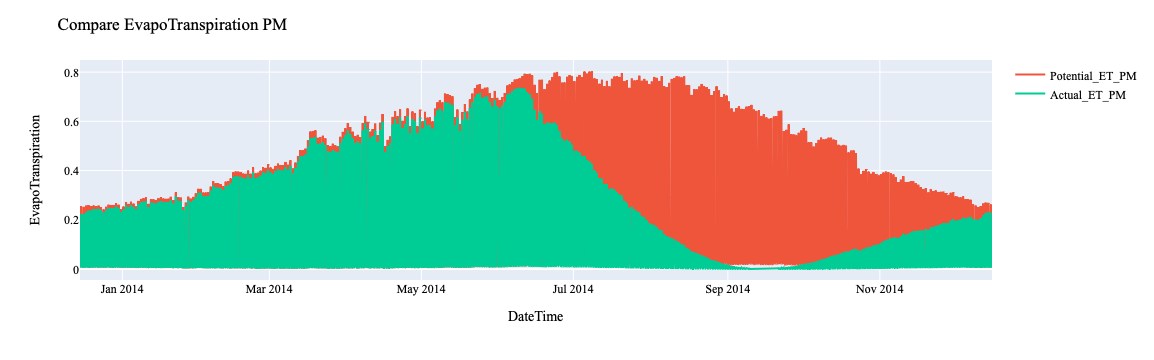

In [6]:
fig = px.line()
#PM
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['EvapoTranspiration'], mode='lines', name='Potential_ET_PM'))
#PM
fig.add_trace(go.Scatter(x=df3['Datetime'], y=df3['EvapoTranspiration'], mode='lines', name='Actual_ET_PM'))


fig.update_layout(
    title='Compare EvapoTranspiration PM',
    xaxis_title="DateTime",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="EvapoTranspiration",
    #legend_title="Date",
    font=dict(size=12))
fig.show()